# Problem Set Six

## Table of Contents
<a href="#exec-summ">Executive Summary</a> <br/>
<a href="#data-set">Data Set</a> <br/>
<a href="#ETL">ETL</a> <br/>
<a href="#s-eda">Single Variable EDA</a> <br/>
<a href="#p-eda">Pairwise EDA</a> <br/>
<a href="#linear-models">Linear Models</a> <br/>
<a href="#eval">Linear Model Evaluation</a> <br/>
<a href="#ml-model">Machine Learning Model</a> <br/>

## Executive Summary

<a id="exec-summ"></a>

We were able to build a model with a 0.83 r-squared value using a random forest machine learning model with 100 trees and a tree depth of 16. This model was built to predict real estate sales prices based on a data set of real estate sales in Washington state. Single variable EDA revealed that in general the data under represented high-value and large properties, so the model is probably best applied to small-to-mid-sized properties. The linear regression model was lackluster, topping out at an r-squared value of 0.62. Learning curves showed that more data wouldn't help improve the model, so unless another feature could be collected and added into the model (e.g. school district), there wasn't much room for improvement.

## Data Set

<a id="data-set"></a>
Our group chose to analyze a data set consisting of real estate sale information. This data set came from Kaggle and can be found here: <a href="https://www.kaggle.com/shree1992/housedata/version/2#"> House Price Predicition Data Set </a>. Each entry represents a real estate sale in the state of Washington real estate market. The table below describes the attributes recorded for each sale.

<table class="variable-table">
            <thead>
                <tr>
                    <th><center>Variable Name</center></th>
                    <th><center>Variable Type</center></th>
                    <th><center>Computer Data Type</center></th>
                    <th><center>Description</center></th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>Bathrooms</td>
                    <td>Numerical</td>
                    <td>Float</td>
                    <td>Number of bathrooms (including half baths) in the house </td>
                </tr>
                <tr>
                    <td>City</td>
                    <td>Categorical</td>
                    <td>Object - String</td>
                    <td>Name of the city where the property is located</td>
                </tr>
                <tr>
                    <td>Country</td>
                    <td>Categorical</td>
                    <td>Object - String</td>
                    <td>Name of the country where the property is located</td>
                </tr>
                <tr>
                    <td>Condition</td>
                    <td>Numerical</td>
                    <td>Integer</td>
                    <td>Numerical grading of the condition of the property</td>
                </tr>
                <tr>
                    <td>Date</td>
                    <td>Numerical</td>
                    <td>Ordinal</td>
                    <td>Date the property was sold</td>
                </tr>
                <tr>
                    <td>Floors</td>
                    <td>Numerical</td>
                    <td>Float</td>
                    <td>Number of floors (including half floors) in the house </td>
                </tr>
                <tr>
                    <td>Statezip</td>
                    <td>Categorical</td>
                    <td>Object - String</td>
                    <td>A concatentation of the state and the zipcode where the house is located</td>
                </tr>
                <tr>
                    <td>Street</td>
                    <td>Categorical</td>
                    <td>Object - String</td>
                    <td>Street name and house number where the house is located</td>
                </tr>
                <tr>
                    <td>sqft_above</td>
                    <td>Numerical</td>
                    <td>Integer</td>
                    <td>Square footage of the house that exists above ground level</td>
                </tr>
                <tr>
                    <td>sqft_basement</td>
                    <td>Numerical</td>
                    <td>Integer</td>
                    <td>Square footage of the house that exists below ground level</td>
                </tr>
                <tr>
                    <td>sqft_living</td>
                    <td>Numerical</td>
                    <td>Integer</td>
                    <td>Square footage of the house</td>
                </tr>
                <tr>
                    <td>sqft_lot</td>
                    <td>Numerical</td>
                    <td>Integer</td>
                    <td>Square footage of the entire lot that the house exists on</td>
                </tr>
                <tr>
                    <td>Waterfront</td>
                    <td>Numerical</td>
                    <td>Binary</td>
                    <td>Indicator if the property is a waterfront property</td>
                </tr>
                <tr>
                    <td>View</td>
                    <td>Numerical</td>
                    <td>Integer</td>
                    <td>Numerical grading of the view from the house</td>
                </tr>
                <tr>
                    <td>yr_build</td>
                    <td>Numerical</td>
                    <td>Integer</td>
                    <td>Year that the house was built</td>
                </tr>
                <tr>
                    <td>yr_renovation</td>
                    <td>Numerical</td>
                    <td>Integer</td>
                    <td>Year that the house last underwent a renovation</td>
                </tr>
                <tr>
                    <td>Price</td>
                    <td>Numerical</td>
                    <td>Float</td>
                    <td>Price the property sold for in USD</td>
                </tr>
            </tbody>
        </table>

To go along with the defintions, here's a quick look at what the data looks like in file. In the ETL section of the notebook we'll load in the data and get a cleaner look with how Pandas output is formatted.

In [1]:
%alias head powershell -command "& {Get-Content %s -Head 10}"

%alias tail powershell -command "& {Get-Content %s -Tail 10}"

%head 'real-estate-data.csv'

date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
2014-05-02 00:00:00,550000.0,4.0,2.5,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
2014-05-02 00:00:00,490000.0,2.0,1.0,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
2014-05-02 00:00:00,335000.0,2.0,2.0,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
2014-05-02 00:00:00,482000.0,4.0,2.5,2710,35868,2

## ETL

This data set was pretty clean, so there wasn't much work in terms of de-duping or data cleaning. There were some sales that were marked with a sales price of $0; these were removed and nothing was done in an attempt to impute to missing value. Also, all float values in the data set are no more precise than two digits after the decimal point, so all formatting for display of float values was defaulted to this.

In [2]:
import pandas as pd

data = pd.read_csv("real-estate-data.csv")

#  remove any sale that went for $0
data = data[data.price != 0]

#  remove large outliers
data = data[data.price < 10000000]

#  default to only showing two digits of precision
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.00,3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.00,5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.00,3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.00,3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.00,4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Single Variable EDA

<a id="s-eda"></a>

The groups members split up this task during the second week of the group discussion mini-project. I was responsible for the variables in the list below. I have directly included what the other group members put in their notebooks for the variables they were assigned.

<ul>
    <li>Bathrooms</li>
    <li>City</li>
    <li>Condition</li>
    <li>Floors</li>
    <li>sqft_living</li>
</ul>

In [3]:
import bfach2_lib as utils
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

### Bathrooms

All of these values should be in half increments, and the spread of the number of bathrooms should roughly coincide with how the square footage of homes is distributed. So there should only be a handful of properties with a large amount of bathrooms.

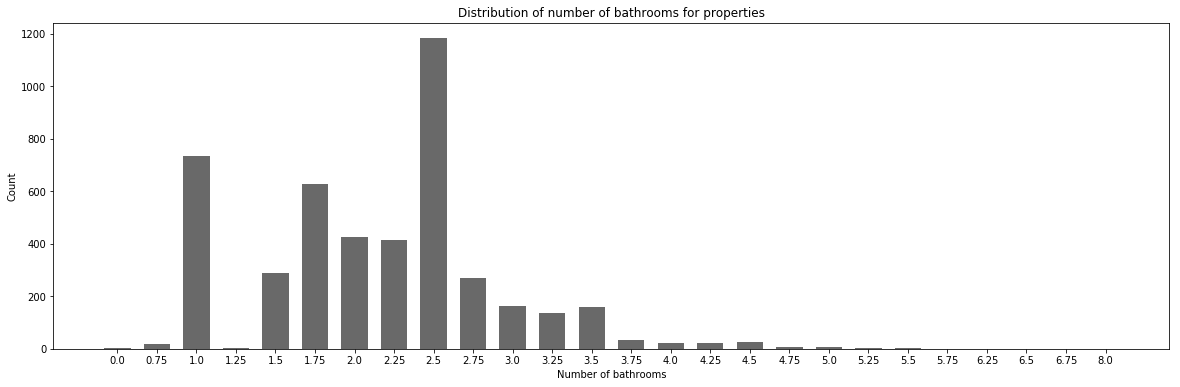

In [4]:
bathroom_counts = data["bathrooms"].value_counts().sort_index()
x = range( len( bathroom_counts))
width = 1/1.5

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, bathroom_counts, width, color="dimgray", align="center")
axes.set_xticks(x)
axes.set_xticklabels(bathroom_counts.axes[0])
axes.set_title( "Distribution of number of bathrooms for properties")
axes.set_xlabel("Number of bathrooms")
axes.set_ylabel( "Count")
axes.xaxis.grid(False)

plt.show()
plt.close()

As expected the counts tail off at larger number of bathrooms. 2.5 bathrooms definitely dominates the data set but a normal model still could feasibly model this distribution; the only problem is with the count of properies with only one bathroom.

### Bedrooms

In [5]:
col = 'bedrooms'
print("Variable: {:}\n{:}\n".format(col, data[col].describe()))

Variable: bedrooms
count   4549.00
mean       3.39
std        0.90
min        0.00
25%        3.00
50%        3.00
75%        4.00
max        9.00
Name: bedrooms, dtype: float64



The variable for bedrooms appears to be roughly normally distributed. Three or four bedrooms appears to be the norm. There are some strange outliers, like at least one 9 room mansion, and a zero bedroom. Maybe the zero bedroom is a typo.

### City

It may be helpful to convert this variable later on to some sort of numeric variable; lat/lon coordinates maybe. Then some more in-depth analysis of proximity to other location's effect on price. For now, just looking at the distribution of evaluated properties across the cities.

In [6]:
pd.DataFrame(data["city"].value_counts().sort_index())

,city
Algona,5
Auburn,175
Beaux Arts Village,1
Bellevue,281
Black Diamond,8
Bothell,33
Burien,72
Carnation,22
Clyde Hill,9
Covington,42


It makes sense that at first glance the number of evaluated properties is higher in urban areas than in rural areas. It may follow that the model is better at predictions for properties located in cities than it is for properties in rural areas.

### Condition

There wasn't a definition of condition provided with the data, but it can be assumed that higher condition values means the home is in better condition.

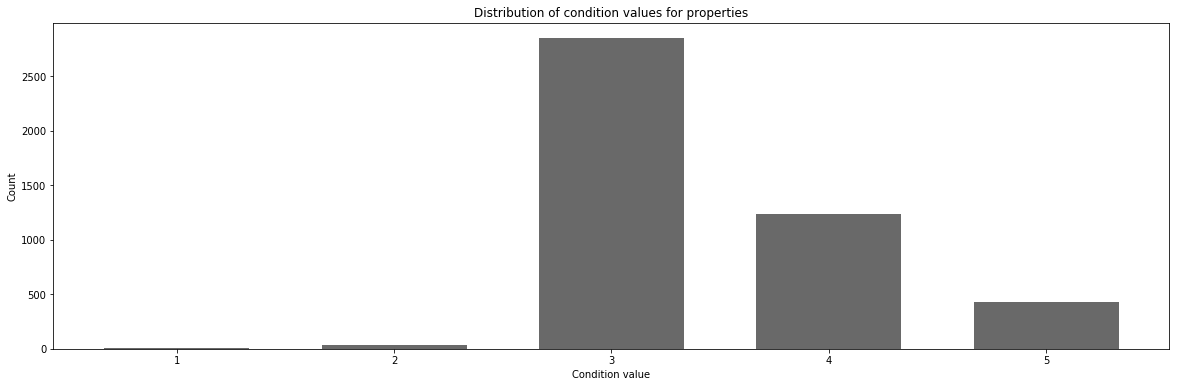

In [7]:
condition_counts = data["condition"].value_counts().sort_index()
x = range( len( condition_counts))
width = 1/1.5

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, condition_counts, width, color="dimgray", align="center")
axes.set_xticks(x)
axes.set_xticklabels(condition_counts.axes[0])
axes.set_title( "Distribution of condition values for properties")
axes.set_xlabel("Condition value")
axes.set_ylabel( "Count")
axes.xaxis.grid(False)

plt.show()
plt.close()

There is definitely a shortage of poorer conditioned homes that were evaluated. There is also a massive spike of fair conditioned homes. Models built on this data may overvalue poor conditioned homes and undervalue good/great conditioned homes.

### Floors

Domain knowledge doesn't tell us much to expect for this distribution of values other than to expect the data set to be dominated by one and two floor homes. However, not certain if this should coincide with the distribution of square footage because a large home could techinically be a one-story rancher.

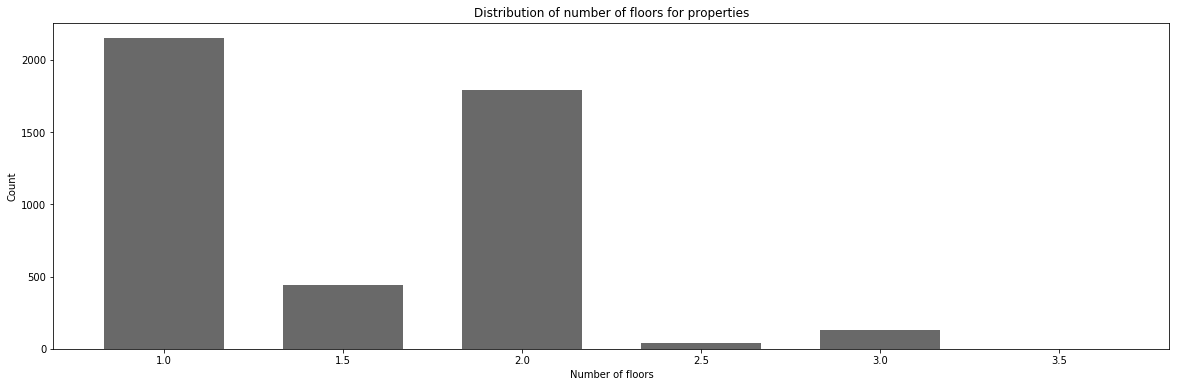

In [8]:
floor_counts = data["floors"].value_counts().sort_index()
x = range( len( floor_counts))
width = 1/1.5

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, floor_counts, width, color="dimgray", align="center")
axes.set_xticks(x)
axes.set_xticklabels(floor_counts.axes[0])
axes.set_title( "Distribution of number of floors for properties")
axes.set_xlabel("Number of floors")
axes.set_ylabel( "Count")
axes.xaxis.grid(False)

plt.show()
plt.close()

### Location

The state-zip is used here as the indicator of location because the street address are too unique to the observation and country is too broad for this dataset. The reason that we don't use city as location is that different cities can share the same name.

In [9]:
pd.DataFrame(data.statezip.value_counts(normalize=True).sort_index()).head()

,statezip
WA 98001,0.01
WA 98002,0.01
WA 98003,0.01
WA 98004,0.02
WA 98005,0.01


### Sqft_above

Sqft_above is the living space above the basement. For analysis the variable, sqft_basement has to be considered along with this as these two variable together contribute to the sqft_living. 

In [10]:
col = 'sqft_above'
print("Variable: {:}\n{:}\n".format(col, data[col].describe()))

Variable: sqft_above
count   4549.00
mean    1822.42
std      854.58
min      370.00
25%     1190.00
50%     1590.00
75%     2300.00
max     9410.00
Name: sqft_above, dtype: float64



The Square Feet Above appears to be approximately log normally distributed. We'll probably have to model this one as log(sqft_above).  

Half of the house has above/below 1590 sqft above ground. while there is one tiny home with only 370 and a mansion with 9410.  

In general, there is going to be a lot of correlation among sqft_lot, \_above, \_basement, & \_living. We'll just have to see which one is the best fit and use it for our model.

- - -

The minimum sqft_above is 370 sq.ft and the maximum value is 9410 sq.ft where 50% of the houses in our dataset has sqft_above below 1590 sq.ft.Let's take the log transformation of this variable as well as per the values shown above the data is not distributed normally

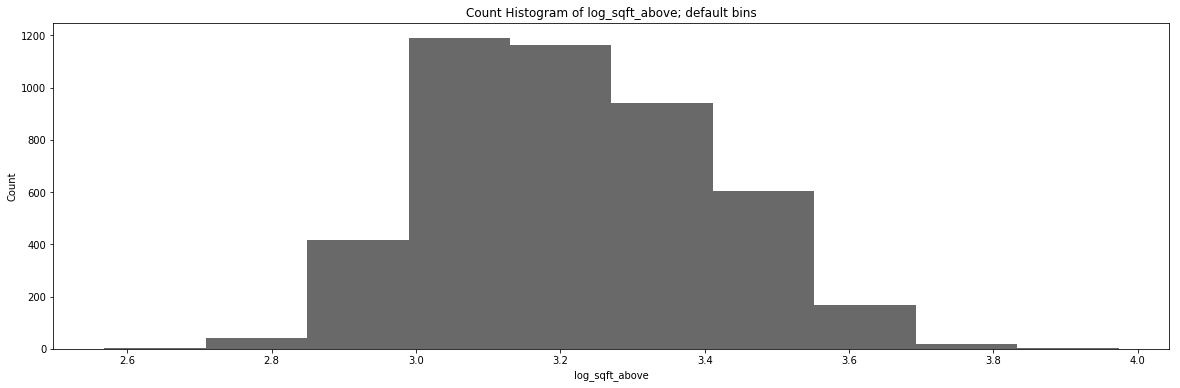

In [11]:
data["log_sqft_above"] = data[ "sqft_above"].apply(lambda x: np.log10(x))

feature = "log_sqft_above"

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(data[feature], color="DimGray")
axes.set_xlabel(feature)
axes.set_ylabel("Count")
axes.set_title("Count Histogram of " + feature + "; default bins")

plt.show()
plt.close()

There is still some skewness attached to the data which in my opinon might be due to the bias in the data set.. 

### Sqft_basement

count   4549.00
mean     310.15
std      462.04
min        0.00
25%        0.00
50%        0.00
75%      600.00
max     4820.00
Name: sqft_basement, dtype: float64

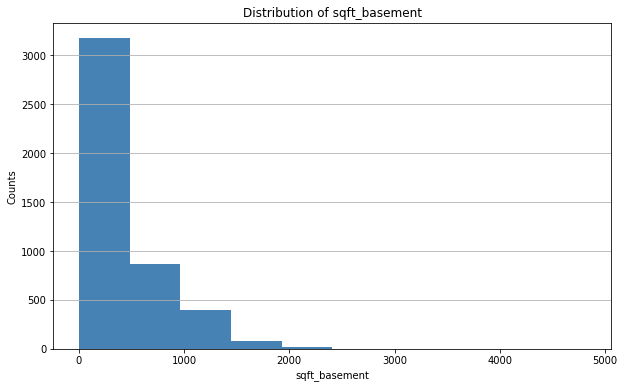

In [12]:
display(data.sqft_basement.describe())
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(data.sqft_basement, color="steelblue")
axes.set_title("Distribution of sqft_basement")
axes.set_xlabel("sqft_basement")
axes.set_ylabel("Counts")
axes.yaxis.grid( b=True, which="major")
axes.xaxis.grid(False)
plt.show()
plt.close()

### Sqft_living

With this numerical variable, looking to have enough values across the distribution to provide accurate predictions for houses of all sizes. Knowing what distribution could be used to model it will also be helpful in analysis down the road.

In [13]:
data["sqft_living"].describe()

count    4549.00
mean     2132.57
std       956.06
min       370.00
25%      1460.00
50%      1970.00
75%      2610.00
max     13540.00
Name: sqft_living, dtype: float64

It looks like there may be some very large homes in this data set. This may overinflate price values because of how different it is in terms of magnitude.

### Sqft_lot

In [14]:
col = 'sqft_lot'
print("Variable: {:}\n{:}\n".format(col, data[col].describe()))

Variable: sqft_lot
count      4549.00
mean      14837.59
std       35971.80
min         638.00
25%        5000.00
50%        7680.00
75%       10970.00
max     1074218.00
Name: sqft_lot, dtype: float64



Lot size is a pretty strange distribution. Maybe log normal? maybe pareto? The smallest lot is only 638 sqft, while the largest is over 1 million. However, most lots (50%) are in the 5,000 to 7,700 sqft range.

Maybe the lot size will be more independent of the other sqft measures than I thought.

- - -

The smallest lot is 638 square feet. The largest lot is 1,074,218 square feet. We can perform a log transformation on sqft_lot to scale these values.

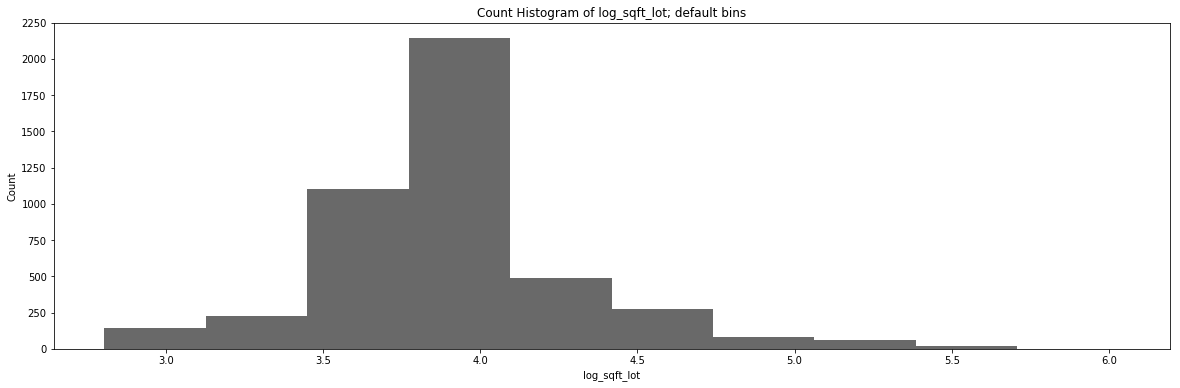

In [15]:
data["log_sqft_lot"] = data[ "sqft_lot"].apply(lambda x: np.log10(x))

feature = "log_sqft_lot"

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(data[feature], color="DimGray")
axes.set_xlabel("log_sqft_lot")
axes.set_ylabel("Count")
axes.set_title("Count Histogram of " + feature + "; default bins")

plt.show()
plt.close()

The distribution is fairly normal with apparent skewness. 

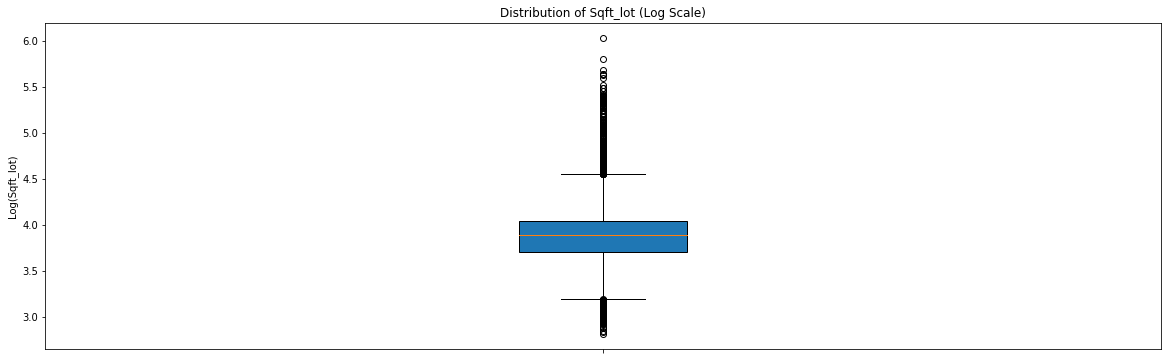

In [16]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(data[ "log_sqft_lot"], labels=[""], \
                     showfliers=True, patch_artist=True, zorder=1)
axes.set_title("Distribution of Sqft_lot (Log Scale)")
axes.set_ylabel("Log(Sqft_lot)")

plt.show()
plt.close()

There appears to be a large variability on the higher range of the sqft_lot which is common as most of the houses will be of average lot size with few houses being very big.

### Waterfront

In [17]:
col = 'waterfront'
print("Variable: {:}\n{:}\n".format(col, data[col].describe()))

Variable: waterfront
count   4549.00
mean       0.01
std        0.08
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: waterfront, dtype: float64



Waterfront is pretty predictable, where only 0.7% of the homes have water front property. That's only 33 homes, and might not be a large enough sample size to draw many meaningful conclusions.

### View

,view
0,0.90
1,0.02
2,0.04
3,0.03
4,0.01


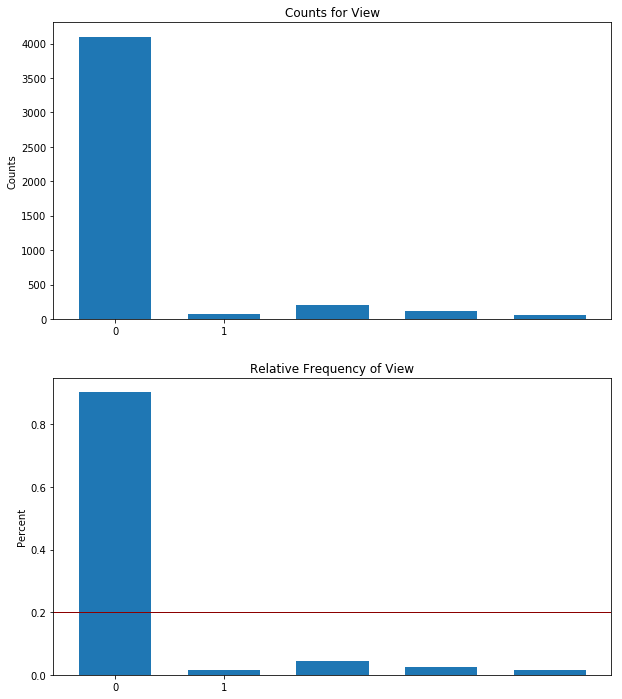

In [18]:
data.view = data.view.astype('category')
display(pd.DataFrame(data.view.value_counts(normalize=True).sort_index()))

# Plot the histogram
counts = data.view.value_counts().sort_index()
proportions = data.view.value_counts(normalize=True).sort_index()
x = range(len(counts))
width = 1/1.5
figure = plt.figure(figsize=(10, 12))
axes = figure.add_subplot(2, 1, 1)
axes.bar(x, counts, width, align='center')
axes.set_xticks([0, 1])
axes.set_xticklabels(counts.axes[0])
axes.set_title('Counts for View')
axes.set_ylabel('Counts')
axes.xaxis.grid(False)
axes = figure.add_subplot(2, 1, 2)
axes.bar(x, proportions, width, align="center")
axes.axhline(1/len(counts), 0, 4, lw=1, color="DarkRed")
axes.set_xticks([0, 1])
axes.set_xticklabels(proportions.axes[0])
axes.set_title('Relative Frequency of View')
axes.set_ylabel('Percent')
axes.xaxis.grid(False)

### Year Built

In [19]:
col = 'yr_built'
print("Variable: {:}\n{:}\n".format(col, data[col].describe()))
print("Value Counts:\n{:}" .format( data[col].value_counts().head(10)) )

Variable: yr_built
count   4549.00
mean    1970.79
std       29.76
min     1900.00
25%     1951.00
50%     1976.00
75%     1997.00
max     2014.00
Name: yr_built, dtype: float64

Value Counts:
2006    109
2005    103
2004     92
2007     92
1978     90
2003     89
2008     88
1967     82
1977     79
2014     78
Name: yr_built, dtype: int64


Overall, there is growth in the number of house built per year. 50% of the houses were build after 1976, where the first one was built in 1900. Well, it's likely that 1900 is an approximation because they don't know how old the house is, that might need to be taken into account in the model somehow.

Anyway,there seem to be periods of high growth interspersed. While most of the 'top spots' for homes built are in the 2000's, there are a couple in the 60's and 70's.

### Year Renovated

min = 0.00
Q1 = 0.00
mean = 808.48
median (Q2) = 0.00
Q3 = 1999.00
max = 2014.00
range = 2014.00
IQR = 1999.00
variance (std) = 959021.02 (979.30)
COV = 121.13%


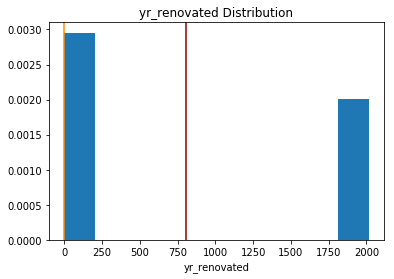

In [20]:
utils.helper_describe_numerical_variable(data, 'yr_renovated')

### Price

Expect to see all positive values here with a distribution that can be well modeled by a normal distribution. This comes from domain knowledge about real estate prices in a small fixed area.

count      4549.00
mean     549470.38
std      368230.65
min        7800.00
25%      326100.00
50%      465000.00
75%      657500.00
max     7062500.00
Name: price, dtype: float64

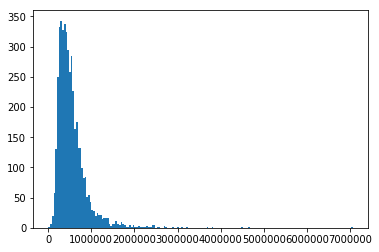

In [21]:
prices = data["price"]
bins = np.histogram_bin_edges(prices, bins='fd')
plt.hist(prices, bins=bins)
prices.describe()

The large difference in magnitudes of some of the homes makes the histogram not such a great representation of this subset of the data. The data description gives some insight into the values; particulary that some zero vales do exist in the data set and that the large difference of magnitudes doesn't drive up the mean that much.

## Pairwise EDA

<a id="p-eda"></a>

The group did numerous Pairwise EDA examples across the submitted notebooks in week 2. I've attempted to choose the most valuable ones based on discussion posted in the group discussion board and based on the correlation statistics based on the two variables. Choice of pairwise EDA also takes into account limitations that may have been discovered in single variable EDA which could cast doubt on the impressions given from pairwise.

### Sqft_Above vs. Price

Based on all of the pairwise EDA's conducted across all square foot measurements and price, sqft_above seemed to have the highest correlation with price. Why it is higher than other square foot measurements, including the composite measurement of sqft_living, is unclear but it may be because housing above ground level is usually liveable and may be of higher importance to customers (typically don't have sleeping areas in below ground areas, like in colonials).

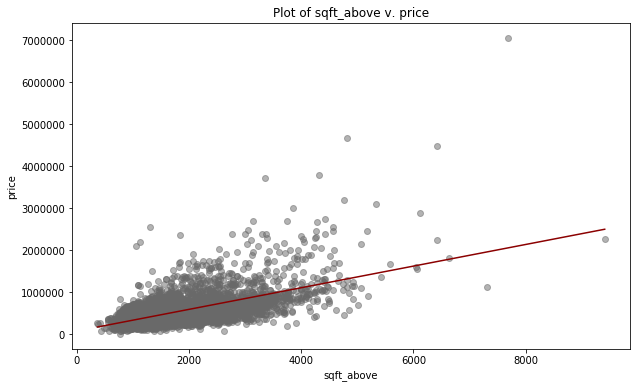

In [22]:
utils.lowess_scatter(data, 'sqft_above', 'price')

### Location (Statezip) vs. Price

I believe some of the group members did various transformations on the statezip field to get a better nominal representation of property location, but even just using statezip to view how it relates to price shows a strong correlation. The boxplots of price in the below figure clearly shift in magnitude based on the location.

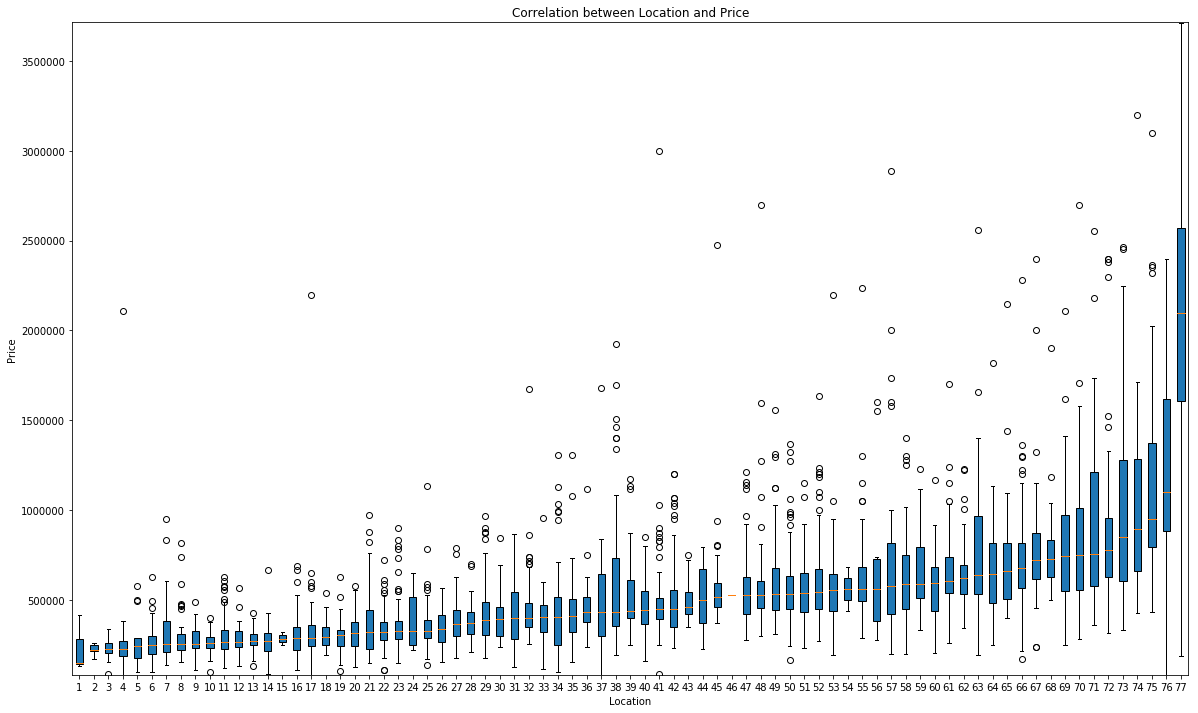

In [23]:
groups = data.groupby('statezip')
groups = sorted(groups, key=lambda x: np.median(x[1].price))
figure = plt.figure(figsize=(20, 12))
axes = figure.add_subplot(1, 1, 1)
axes.boxplot(
    [group.price for name, group in groups],
    patch_artist=True,
    zorder=1)
axes.set_xlabel('Location')
axes.set_ylabel('Price')
axes.set_title('Correlation between Location and Price')
axes.set_ylim(stats.mstats.mquantiles(data.price, [0.001, 0.999]))
plt.show()
plt.close()

### Floors vs. Price

I found an interesting relationship in the data where the sales price of homes with 2.5 floors had a significantly greater Q3 than all other floor amounts. 2.5 floors also had about the same median sales price as houses with 3.5 floors. Based on the sample sizes it didn't seem to be due to an under representative sample of 2.5 floor homes. It could be that homes with 2.5 floors were highly associated with some other variable like location (e.g. 2.5 floor homes were common in recent developments in locations that drove a higher price).

<img src="resources/floors_multibox.png">

### Bedrooms vs. Price

This one seemed rather intuitive; houses with more bedrooms often drive a higher price. This may be because bedrooms acts simply as a stepwise representation of sqft_liveable or sqft_above; there are only so many bedrooms you can fit in a finite space and as bedrooms goes up, so must living space to accomodate for the larger amount of people that will be inhabiting the house at a given time. However, the dot plot shows more of a normal distribution of prices, centering on 4 bedrooms. It would be interesting to see why the price tapers off after 4 bedrooms.

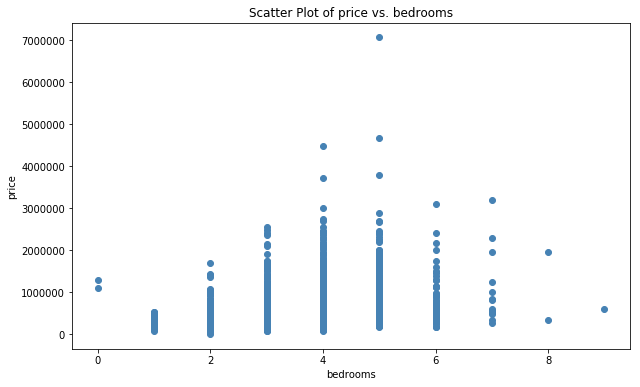

In [24]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(data.bedrooms, data.price, marker="o", color="steelblue")

axes.set_ylabel("price")
axes.set_xlabel("bedrooms")
axes.set_title("Scatter Plot of price vs. bedrooms")

plt.show()
plt.close()

We were able to identify four fairly strong variable relationships with the target variables (price) through pairwise EDA. Interestingly enough, some of the variables that we thought (through domain knowledge) would strongly correlate with sales price seemed to show extremely weak correlations. These include condition, view, and waterfront. In some instances, doing transformations on the variables prior to pairwise EDA comparisons yielded smoother results. One such case was plotting log_price against log_sqft_above. The existence of a relationship was slightly clearer, but not enough that the same message wasn't conveyed without being on a logarithmic scale.

## Linear Models

<a id="linear-models"></a>

We now have a strong idea as to which variables we'd like to include in our prediction model. Our target variable is price, and the variables we want to include in our model are:

<ul>
    <li>Bathrooms</li>
    <li>Bedrooms</li>
    <li>Floors</li>
    <li>Location</li>
    <li>Sqft_above</li>
</ul>

One of our teammates had the idea of converting the zipcodes to two separate attributes of latitude, longitude. This gave a slight improvement in the r-squared of the linear regression model, so I decided to go with that for our linear regression model.

In [25]:
import zipcodes as zcs

#replace location data with latlong, remove other data
if "statezip" in data:
    latlong = [ zcs.matching(z.split(' ')[1])[0] for z in data['statezip'] ]
    data['lat'] = [ x['lat'] for x in latlong ]
    data['long'] = [ x['long'] for x in latlong ]
    data.drop(['statezip'], axis=1)

model = "price ~ bedrooms + floors + bathrooms + sqft_living + lat + long"
result1 = utils.bootstrap_linear_regression(model, data=data)
utils.describe_bootstrap_lr(result1)

The results of the model are OK. Before evaluation, let's see if adding in other sqft measurements improves the model. We went with sqft_above simply because it provided the best correlation with price of all of the sqft measurements.

In [26]:
model = "price ~ bedrooms + floors + bathrooms + sqft_living + sqft_above + sqft_lot + lat + long"
result2 = utils.bootstrap_linear_regression(model, data=data)
utils.describe_bootstrap_lr(result2)

A very slight improvement in both the sigma and the r-squared values, but still not a model that will provide much predictability. Let's evaluate the model and see if any transformations will help us out.

## Linear Model Evaluation

<a id="eval"></a>

### Linear Model Two Residual Plots

Let's start by taking a look at the residual plots for the second model we created. Some of the group members saw better results with transformations on the price and sqft variables, so let's see how the residuals support that.

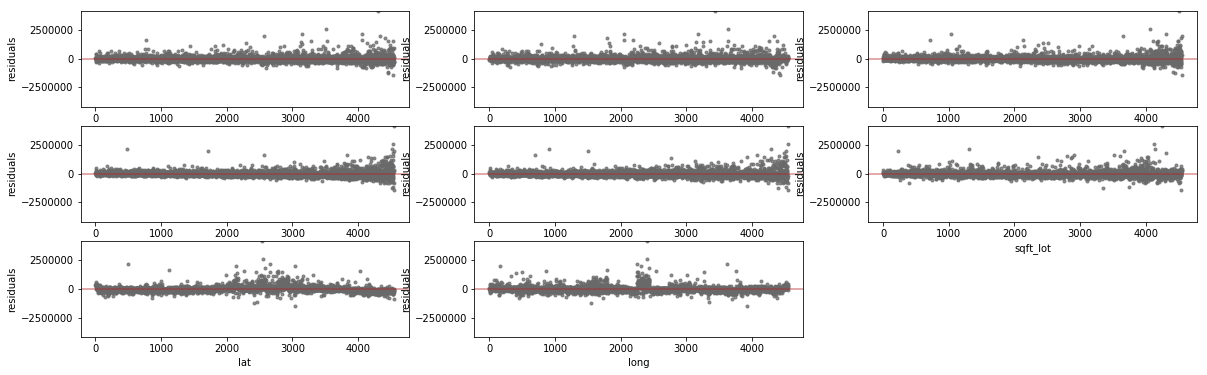

In [27]:
residuals2 = utils.plot_residuals(result2, ["bedrooms", "floors", "bathrooms", "sqft_living", "sqft_above", "sqft_lot", "lat", "long"], data)

All-in-all these residual plots aren't too bad. We don't have any banding, but there are a few residual plots that show we're increasing variability as a function of the value of x. This is OK since we're building a predicitve model and not an explanatory model. The only transformation that pops out at me is the slight bend in the latitiude residual plot.

In [28]:
data["log_lat"] = np.log(data["lat"])
model = "price ~ bedrooms + floors + bathrooms + sqft_living + sqft_above + sqft_lot + log_lat + long"
result3 = utils.bootstrap_linear_regression(model, data=data)
utils.describe_bootstrap_lr(result3)

A very small improvement in our sigma. Perhaps all of the square foot measurements are interacting with each other?

In [29]:
model = "price ~ bedrooms + floors + bathrooms  + sqft_living+ sqft_above + sqft_living:sqft_above + sqft_lot + sqft_living:sqft_lot + sqft_lot:sqft_above + log_lat + long"
    
result4 = utils.bootstrap_linear_regression(model, data=data)
utils.describe_bootstrap_lr(result4)

That's a big improvment! The model still isn't ideal for predictions; we'd like to at least get the r-squared value up into the .8 - .9 range. My initial assumption is that more data won't help with this. The sample size is pretty good, single-variable EDA showed that we had a solid distribution of values across the range of potential values, and we eliminated any outliers or null values dragging the model down. To make certain of this, I'll generate learning curves and see where the model is at on the bias-variance spectrum.

### Learning Curves

Will more data help improve this model?

In [30]:
results = utils.learning_curves(utils.linear_regression, model, data, utils.sse)

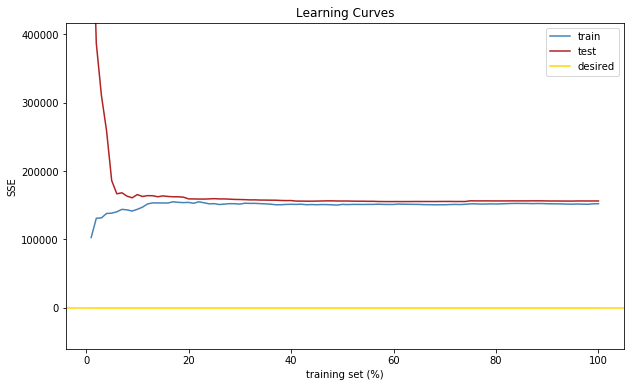

In [31]:
utils.plot_learning_curves(results, r"SSE", desired=(38, 42), zoom=True, credible=False)

As expected, the lines converge and we won't get much use out of adding more data to our model. The only other thing I could think of to increase the performance of our linear model is to somehow perform a valuable transformation from the attributes we already have. My first thought was to try and convert the location attribute to a categorical variables of school district rating. I've noticed that similar properties will be priced much differently according to the school district the property belongs to. Unfortunately I couldn't find any reliable library or API to make this transformation. I'm hoping with the use of a machine learning model we can create a model that will predict price a little better.

## ML Model

<a id="ml-model"></a>

Our group focused on three different machine learning models: Decision Trees, Random Forests, and k-Nearest Neighbors. We saw a large improvement from our linear model using a random forest with tree depths of 16 and 100 trees. One of our group members did great analysis on the optimal tree depth and number of trees, which is included below. As more variables were added (beyond those included in the linear regression model) we noticed diminishing returns. However the increase in r-squared value as these additional variables were added displayed minimal performance degradation of the model, so it was definitely worth it to add these features in the final model.

In [32]:
import graphviz
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor as RFR

### Data Cleanup for ML Model

We include renovation year in this model, so we clean up the data to find null or zero values for year renovated. If there is nothing listed we assign the year built as the last renovation year. This could be misleading, because technically the initial build isn't a renovation and we could be muddying the effect that the fact-of a renovation occuring has on the value of the house. We also take the liberty of making our target variable the price per square foot of liveable space. This could throw off our predictions for houses with a large lot with a small liveable space (e.g. rural property).

In [33]:
##do some data clean up, remove ill-formed entries
greater_than_zero = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                     'floors', 'yr_built']
(n_rows,_) = data.shape
mask = np.zeros(n_rows ) > 0
print("number of rows: {:}".format(n_rows))
for col in greater_than_zero:
    cur_mask = data[col] <= 0
    mask = mask | cur_mask
    print("{:<10}\t{:} less than or equal to zero".format(col, np.sum(mask)))

data.drop( data[mask].index, axis=0, inplace=True)   
(n_rows,_) = data.shape
print("\tAfter removal")
print("\tnumber of rows: {:}".format(n_rows))

#if no date is listed for renovation, assume last 'renovation' was when it was built
temp = [reno if reno > 0 else built for reno,built in zip(data['yr_renovated'], data['yr_built'])]
data['yr_renovated'] = temp

#replace location data with latlong, remove other data
if "statezip" in data:
    latlong = [ zcs.matching(z.split(' ')[1])[0] for z in data['statezip'] ]
    data['lat'] = [ x['lat'] for x in latlong ]
    data['long'] = [ x['long'] for x in latlong ]
    data.drop(['statezip'], axis=1)
    
data['price/living'] = [p/r for p,r in zip(data['price'],data['sqft_living'])]

#drop column country because it's all USA, drop street because it's two unique. Very few repeats
if "country" in data or "street" in data or "city" in data or "statezip" in data or "data" in data:
    data.drop(['country','street','city','statezip','date'],axis=1,  inplace=True)

#an outlier!
mask = data['price/living'] > 1000 
data[ mask ]
data.drop( data[mask].index, axis=0, inplace=True)   
d = data.values
scaler = preprocessing.RobustScaler()
data_scaled = scaler.fit_transform(d)
df_scaled = pd.DataFrame(data_scaled, columns=list(data))

x_str = list(data)
x_str.remove('price')
x_str.remove('price/living')
X = df_scaled[x_str]
Y = df_scaled['price/living']


number of rows: 4549
price     	0 less than or equal to zero
bedrooms  	2 less than or equal to zero
bathrooms 	2 less than or equal to zero
sqft_living	2 less than or equal to zero
sqft_lot  	2 less than or equal to zero
floors    	2 less than or equal to zero
yr_built  	2 less than or equal to zero
	After removal
	number of rows: 4547


Just running an initial decision tree with a depth of 5 to see how this might work and which factors might be important.

MSE:	0.306
Var:	0.648
R^2:	0.527040762546874


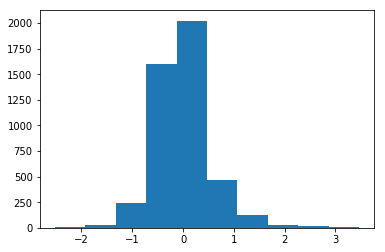

In [34]:
from sklearn.ensemble import RandomForestRegressor as RFR
np.random.seed(8675309)

clf = tree.DecisionTreeRegressor(max_depth=4)
clf = clf.fit(X,Y)
yhat_clf = clf.predict(X)
residual_clf = Y - yhat_clf

plt.figure()
plt.hist(  residual_clf )
mse = np.mean( residual_clf**2)
print("MSE:\t{:.3f}".format(mse))
print("Var:\t{:.3f}".format(np.var(Y)))
print("R^2:\t{:}".format(1 - mse/np.var(Y)) )

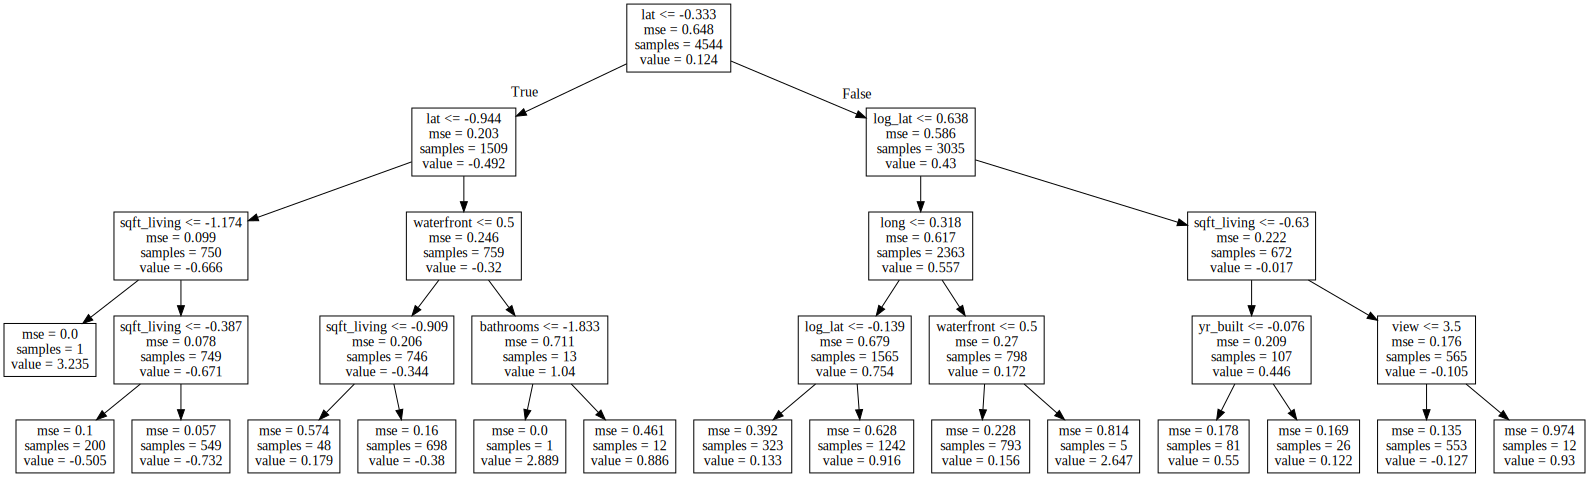

In [35]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=x_str)
graph = graphviz.Source(dot_data)
graph

An $R^2$ of ~0.5 (without cross validation) isn't a very promising start. However, it does give clues as to which will be important. It seems the realty mantra of "Location, Location, Location" seems to hold up, as LatLong seem to be the most import factors.  

Now lets try refining a decision forest. I'll start with a validation curve to check how 'deep' each tree should be. I'll be using the default forest size of 10.

[0.82248211]


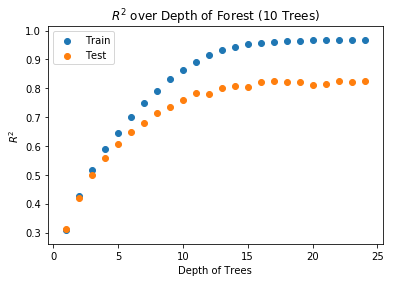

In [37]:
np.random.seed(867539)
rfr = RFR(n_estimators=10)

ks = np.arange(1,25)
r2 = utils.val_cur( X, Y, rfr, 'max_depth', ks, reps=3)
tree_lam = lambda a,b : utils.val_cur( a, b, rfr, 'max_depth', ks)
r2 = utils.boot( X, Y, tree_lam, n = 10)

plt.figure()
plt.scatter(ks, np.mean(r2['train'], axis = 0), label='Train' )
plt.scatter(ks, np.mean(r2['test'], axis = 0), label='Test')
plt.legend()
plt.title('$R^2$ over Depth of Forest (10 Trees)')
plt.xlabel('Depth of Trees')
plt.ylabel('$R^2$')
print( np.mean(r2['test'], axis=0)[np.where(ks==16)] )

It looks like the increase in $R^2$ seems to be diminished after about a depth of 16. However, an $R^2$ of over 0.8 is much better!  

Now lets see how many trees we need in our forest to get a good result using a depth of 16.

[0.83710039]


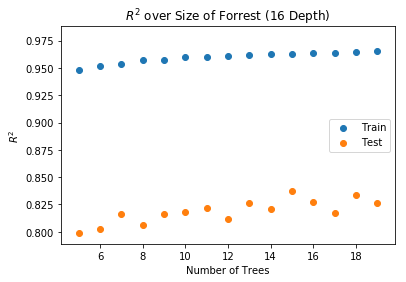

In [39]:
np.random.seed(867539)
rfr = RFR(max_depth=16)

ks = np.arange(5,20)
tree_lam = lambda a,b : utils.val_cur( a, b, rfr, 'n_estimators', ks)
r2 = utils.boot( X, Y, tree_lam, n = 10)

plt.figure()
plt.scatter(ks, np.mean(r2['train'], axis = 0), label='Train' )
plt.scatter(ks, np.mean(r2['test'], axis = 0), label='Test')
plt.legend()
plt.title('$R^2$ over Size of Forrest (16 Depth)')
plt.xlabel('Number of Trees')
plt.ylabel('$R^2$')
print( np.mean(r2['test'],axis=0)[np.where(ks==15)] )


We haven't seen it even off yet, so let's try over a larger range of values.

[0.82955719]


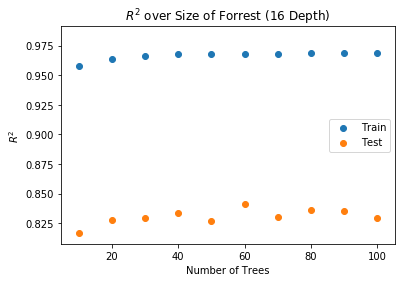

In [40]:
np.random.seed(867539)
rfr = RFR(max_depth=16)

ks = np.arange(10,101,10)
tree_lam = lambda a,b : utils.val_cur( a, b, rfr, 'n_estimators', ks)
r2 = utils.boot( X, Y, tree_lam, n = 10)

plt.figure()
plt.scatter(ks, np.mean(r2['train'], axis = 0), label='Train' )
plt.scatter(ks, np.mean(r2['test'], axis = 0), label='Test')
plt.legend()
plt.title('$R^2$ over Size of Forrest (16 Depth)')
plt.xlabel('Number of Trees')
plt.ylabel('$R^2$')
print( np.mean(r2['test'],axis=0)[np.where(ks==100)] )

We're starting to see a pattern. It seems safe to use a forest size of 100 trees, and the model seems strong; on our test set we achieved an r-squared value of 0.83. We could probably improve on this by adding some features (as described above), but this served as a good use case of how we can iterate over a model to improve predictability.